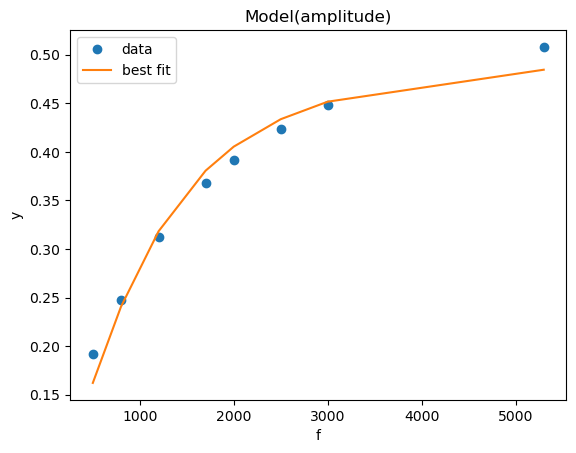

[[Model]]
    Model(amplitude)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 8
    # variables        = 2
    chi-square         = 0.00197670
    reduced chi-square = 3.2945e-04
    Akaike info crit   = -62.4461597
    Bayesian info crit = -62.2872766
    R-squared          = 0.97462065
[[Variables]]
    C:   5.4525e-12 +/- 3.2122e-13 (5.89%) (init = 2e-11)
    R:  -inf (fixed)
    Rs:  1e+07 (fixed)
    Cs:  5.3925e-12 +/- 5.9165e-13 (10.97%) (init = 1e-12)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, Cs) = +0.8988


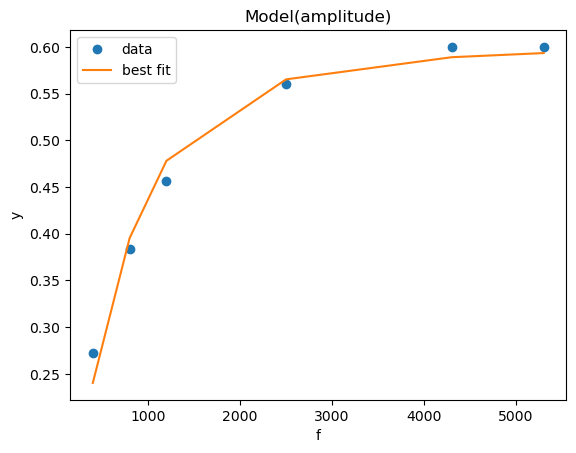

[[Model]]
    Model(amplitude)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 6
    # variables        = 2
    chi-square         = 0.00181589
    reduced chi-square = 4.5397e-04
    Akaike info crit   = -44.6176477
    Bayesian info crit = -45.0341287
    R-squared          = 0.97942230
[[Variables]]
    C:   1.0425e-11 +/- 6.8907e-13 (6.61%) (init = 2e-11)
    R:  -inf (fixed)
    Rs:  1e+07 (fixed)
    Cs:  6.8838e-12 +/- 7.2990e-13 (10.60%) (init = 1e-12)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, Cs) = +0.8656


In [8]:
import numpy as np
import scipy.constants as scc
from matplotlib import pyplot as plt
import numpy as np
import scipy.constants as scc
import pandas as pd 
from IPython.display import display
from PIL import Image
# now write as python function
import numpy as np
import scipy.constants as scc
import pandas as pd
from matplotlib import pyplot as plt
import lmfit 
import os

datadir = 'C:\\Users\\lluri\\Dropbox\\PYTHON - Documents\\Cryopreservation'

# Function definition

def amplitude(f,C,R,Rs,Cs):
    '''
    f = frequency
    C = Capacitor value
    R = Resistor value
    Rs = Scope impedence
    Cs = Scope capacitance
    '''
    w = 2*np.pi*f
    Zp  = 1/(1/R + 1/Rs +  1j*w*Cs)
    Xc = -1j/w/C 
    A = np.abs(Zp/(Xc + Zp))
    return(A)

# turn function into a fitting model using lmfit library 
amplitude_model = lmfit.Model(amplitude)

# get starting parameters
params = amplitude_model.make_params(C = 20*scc.pico, \
     Rs = 10*scc.mega, Cs = 1*scc.pico)
params["C"].vary = True
params["R"].vary = False
params["Rs"].vary = False 
params["Cs"].vary = True

# read in csv data
V0 = 2 # peak to peak output voltage
df = pd.read_csv(datadir + '\\' + 'New measurements.csv')

R = df["Resistance (Mega Ohms)"].to_numpy()*scc.mega
f = df["Frequency (Hz)"].to_numpy()
A = df["Voltage "].to_numpy()/V0

# fit 1M data

range = np.argwhere(R == 1*scc.mega)

result = amplitude_model.fit(A[range],params, f=f[range])

result.plot_fit()
plt.show()

print(result.fit_report())

# fit 2M data

range = np.argwhere(R == 2*scc.mega)

result = amplitude_model.fit(A[range],params, f=f[range])

result.plot_fit()

plt.show()

print(result.fit_report())

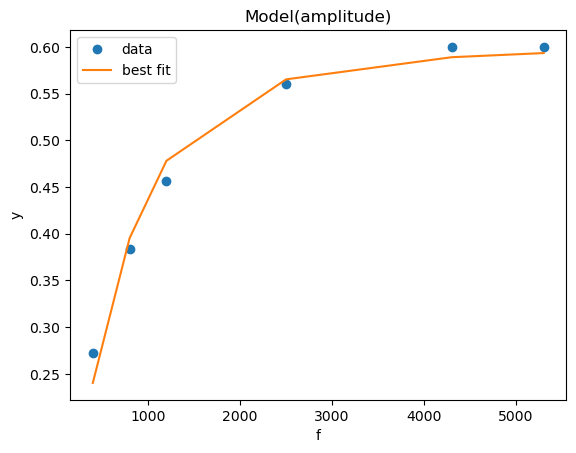

[[Model]]
    Model(amplitude)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 6
    # variables        = 2
    chi-square         = 0.00181589
    reduced chi-square = 4.5397e-04
    Akaike info crit   = -44.6176477
    Bayesian info crit = -45.0341287
    R-squared          = 0.97942230
[[Variables]]
    C:   1.1467e-10 +/- 7.5798e-12 (6.61%) (init = 2e-11)
    R:   1000000 (fixed)
    Rs:  1e+07 (fixed)
    Cs:  7.5722e-11 +/- 8.0289e-12 (10.60%) (init = 1e-12)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, Cs) = +0.8656
